In [81]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
            #  to predict the closing price of Tesla corporation.

In [82]:
# To predict closing price of a stock with input of past 60 days stock price.

In [83]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date

In [84]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('TSLA', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index = df.index[::-1])
print(df)

                 Open       High        Low      Close     Volume
Date                                                             
2012-01-03    1.92933    1.96667    1.84333    1.87200   13920780
2012-01-04    1.88067    1.91133    1.83333    1.84733    9246990
2012-01-05    1.85067    1.86200    1.79000    1.80800   15081480
2012-01-06    1.81667    1.85267    1.76067    1.79400   14794305
2012-01-09    1.80000    1.83267    1.74133    1.81667   13454265
...               ...        ...        ...        ...        ...
2023-09-07  245.07000  252.81000  243.26500  251.49000  115312886
2023-09-08  251.22000  256.52000  246.67000  248.50000  118559635
2023-09-11  264.27000  274.85000  260.61000  273.58000  174667852
2023-09-12  270.76000  278.39000  266.60000  267.48000  135999866
2023-09-13  270.07000  274.98000  268.10000  271.30000  111673737

[2943 rows x 5 columns]


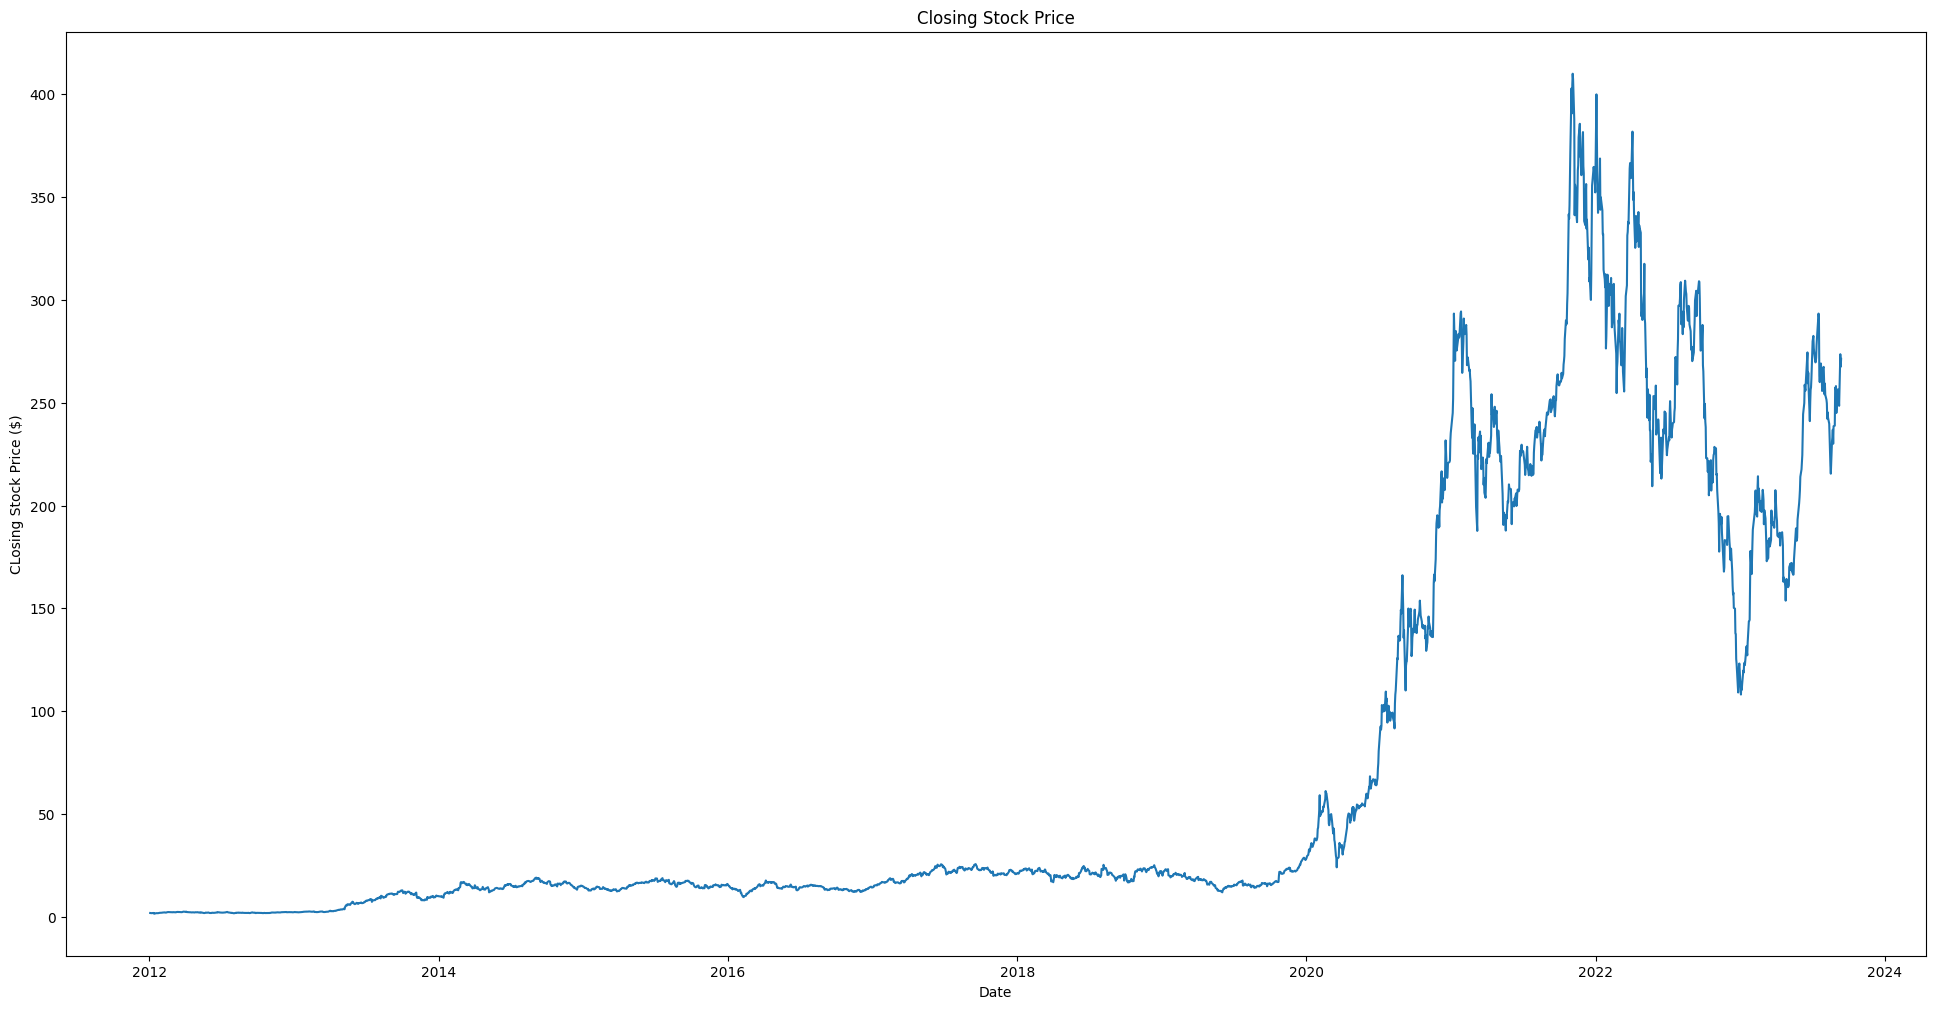

In [85]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(24,12))
plt.title("Closing Stock Price")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("CLosing Stock Price ($)")
plt.show()

In [86]:
#Create A New DataFrame with only Close column
data = df.filter(['Close'])
#Convert DataFrame To Numpy Array
dataset = data.values

# Training -> 80% data
# Testing -> 20% data

training_data_len = math.ceil((len(dataset)) * 0.8)
print(training_data_len)

2355


In [87]:
print(dataset)

[[  1.872  ]
 [  1.84733]
 [  1.808  ]
 ...
 [273.58   ]
 [267.48   ]
 [271.3    ]]


In [88]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.00086343]
 [0.00080303]
 [0.00070674]
 ...
 [0.66607963]
 [0.65114514]
 [0.66049756]]


In [89]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [90]:
print(x_train[0])
print(y_train[0])

[0.00086343 0.00080303 0.00070674 0.00067247 0.00072797 0.00078834
 0.00088792 0.00089117 0.         0.00062186 0.00065614 0.00064799
 0.00062186 0.00064963 0.00075571 0.00084549 0.00100379 0.00106745
 0.00110662 0.00102502 0.00110826 0.00121763 0.00136452 0.00147061
 0.00143797 0.00149183 0.00159792 0.00135634 0.00142    0.00169421
 0.0017644  0.00186069 0.001988   0.0019113  0.00186559 0.00191619
 0.00178888 0.00176766 0.00179867 0.00173338 0.00189661 0.00183621
 0.00179214 0.00168441 0.00168605 0.0016779  0.00195047 0.00215776
 0.00217081 0.00204025 0.0019929  0.00204514 0.00198964 0.00198638
 0.00201738 0.00189497 0.00184274 0.00238462 0.00247276 0.00245807]
0.002373211922996723


In [91]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [92]:
unscaled_data = scaler.inverse_transform(dataset)
print(unscaled_data)

[[   766.13898424]
 [   756.06250621]
 [   739.99814136]
 ...
 [111745.4536286 ]
 [109253.9045416 ]
 [110814.186101  ]]


In [93]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [94]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1))) # Input Layer
model.add(LSTM(50, return_sequences = False)) # Long Term Memory Layer
model.add(Dense(25)) # Short Term Memory Layer
model.add(Dense(1)) # Forget Gate

In [95]:
# Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
23/23 [==============================] - 7s 85ms/step - loss: 0.0028
Epoch 2/64
23/23 [==============================] - 2s 85ms/step - loss: 4.8841e-04
Epoch 3/64
23/23 [==============================] - 2s 85ms/step - loss: 2.3448e-04
Epoch 4/64
23/23 [==============================] - 2s 108ms/step - loss: 1.9676e-04
Epoch 5/64
23/23 [==============================] - 4s 186ms/step - loss: 1.8635e-04
Epoch 6/64
23/23 [==============================] - 2s 95ms/step - loss: 1.9042e-04
Epoch 7/64
23/23 [==============================] - 2s 85ms/step - loss: 1.7102e-04
Epoch 8/64
23/23 [==============================] - 2s 86ms/step - loss: 1.6080e-04
Epoch 9/64
23/23 [==============================] - 2s 86ms/step - loss: 1.6964e-04
Epoch 10/64
23/23 [==============================] - 2s 86ms/step - loss: 1.6977e-04
Epoch 11/64
23/23 [==============================] - 3s 137ms/step - loss: 1.5810e-04
Epoch 12/64
23/23 [==============================] - 2s 85ms/step - loss: 1

In [96]:
# Create a Testing Dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [97]:
# Convert Data Into Numpy Array
x_test = np.array(x_test)
# Reshape The Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [98]:
# Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Error % = ", rmse)
print("Accuracy % = ", (100-rmse))

19/19 [==============================] - 2s 19ms/step
Error % =  11.644924716073913
Accuracy % =  88.35507528392608


<ipython-input-99-c8af41b10fce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


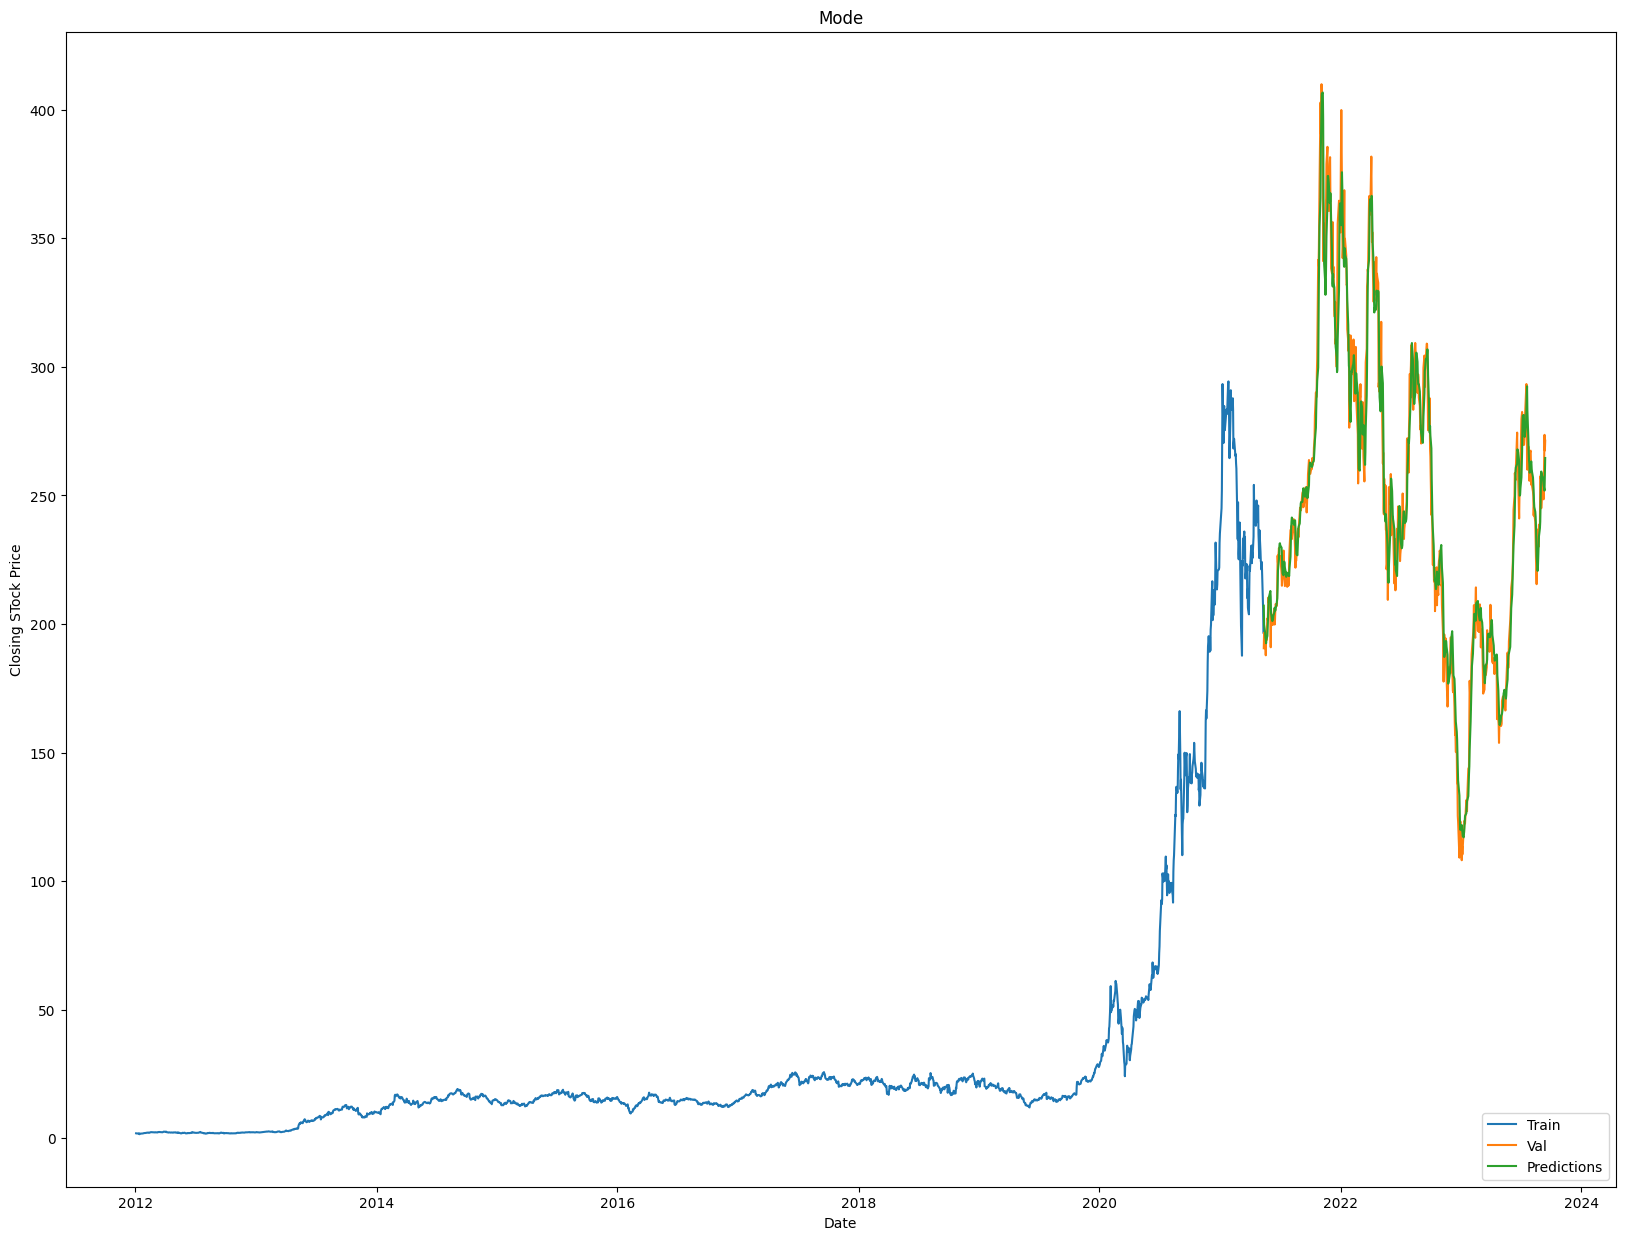

In [99]:
# Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,15))
plt.title("Mode")
plt.xlabel("Date")
plt.ylabel("Closing STock Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [100]:
# Use Model to Predict Future Price
Google_quote = web.DataReader('GOOGL', data_source = 'stooq', start = startDate, end = endDate)
new_df = Google_quote.filter(['Close'])
last_60_days = new_df[:60].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 32ms/step
[[124.676834]]
